In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# #Load data from URL
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# data = pd.read_csv(url,
#                    names= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
#                            'race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income_class'])

# # Save data to CSV file
# data.to_csv('adult_data.csv', index=False)


In [3]:
# Read data from CSV file
data = pd.read_csv('adult_data.csv')

In [4]:
# Original Data
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

In [5]:
# Check for missing values
data.isnull().sum()   #no missing values itseems

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_class      0
dtype: int64

In [6]:
data['income_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: income_class, dtype: int64

In [7]:
# Create target column using boolean indexing for target
data['target'] = (data['income_class'] == ' >50K').astype(int)

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [9]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
# Drop rows with '?' values
data = data[data['workclass'] != ' ?']
data = data[data['occupation'] != ' ?']

In [11]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [12]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
#create dataframe of dummy variables
diff = data[['workclass','education','marital-status','occupation','relationship','race']]

# one hot encoding for 'workclass' feature
data_onehot_df = pd.get_dummies(diff, prefix=['workclass','education','marital-status','occupation','relationship','race'])

In [14]:
data_onehot_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [15]:
# dropping unnecessary columns
data.drop(['fnlwgt', "education-num"],axis=1, inplace=True)

In [16]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [17]:
data['native-country'].value_counts
data['native-country'] = data['native-country'].astype(str)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [18]:
# If American = 1, individual is from USA. Else, it is 0.
data["American"] = np.where(data["native-country"] == " United-States", 1,0)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target,American
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1


In [19]:
# combine dummy variables with original data frame
data_concat = pd.concat([data, data_onehot_df], axis=1)
data_concat

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
# Drop variables that were one hot encoded
data_concat.drop(['workclass', "education", "marital-status", "relationship", "occupation", "race", "sex", "native-country", "income_class"],axis=1, inplace=True)
data_concat = data_concat.reset_index(drop = True)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
# standardizing the quantatative variables. Sets their mean equal to 0, stddev = 1

data_concat2 = data_concat.iloc[:, :4]
data_concat_scaled = pd.DataFrame(scaler.fit_transform(data_concat2))
data_concat_scaled.rename(columns={0: "age", 1: "capital-gain", 2 : "capital-loss", 3 : "hours-per-week"}, inplace = True)
data_concat_scaled.reset_index(drop = True)
data_concat_scaled

data_concat["age"] = data_concat_scaled["age"]
data_concat["capital-gain"] = data_concat_scaled["capital-gain"]
data_concat["capital-loss"] = data_concat_scaled["capital-loss"]
data_concat["hours-per-week"] = data_concat_scaled["hours-per-week"]
data_concat

,age,capital-gain,capital-loss,hours-per-week,target,American,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042416,0.142438,-0.219179,-0.079207,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880958,-0.147516,-0.219179,-2.331988,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033815,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1.109651,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.796125,-0.147516,-0.219179,-0.079207,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,-0.872356,-0.147516,-0.219179,-0.246080,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
30714,0.118647,-0.147516,-0.219179,-0.079207,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30715,1.490806,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
30716,-1.253512,-0.147516,-0.219179,-1.747934,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


# y_pre = data_concat.drop(['target'],axis=1)
# X = np.array(y_pre)
# Y = np.array(data_concat.target)

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=48824)

# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train,Y_train)
# y_pred = rfCLF.predict(X_test)

# print("ACCURACY OF THE RANDOM FOREST MODEL: ", metrics.accuracy_score(Y_test, y_pred))

In [24]:
features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week',
            'American', 'workclass_ Federal-gov', 'workclass_ Local-gov',
            'workclass_ Private', 'workclass_ Self-emp-inc',
            'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
            'workclass_ Without-pay', 'education_ 10th', 'education_ 11th',
            'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
            'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
            'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
            'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
            'education_ Prof-school', 'education_ Some-college',
            'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
            'marital-status_ Married-civ-spouse',
            'marital-status_ Married-spouse-absent',
            'marital-status_ Never-married', 'marital-status_ Separated',
            'marital-status_ Widowed', 'occupation_ Adm-clerical',
            'occupation_ Armed-Forces', 'occupation_ Craft-repair',
            'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
            'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
            'occupation_ Other-service', 'occupation_ Priv-house-serv',
            'occupation_ Prof-specialty', 'occupation_ Protective-serv',
            'occupation_ Sales', 'occupation_ Tech-support',
            'occupation_ Transport-moving', 'relationship_ Husband',
            'relationship_ Not-in-family', 'relationship_ Other-relative',
            'relationship_ Own-child', 'relationship_ Unmarried',
            'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
            'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other',
            'race_ White']
            
target = 'target'

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_concat[features], 
                                                    data_concat[target], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [26]:
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, 
                                                  test_size=0.5, 
                                                  random_state=42)

In [75]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8375651041666666


In [76]:
y_pred_eval = clf.predict(X_eval)
accuracy_eval = metrics.accuracy_score(y_eval, y_pred_eval)
print(f"Evaluation accuracy: {accuracy_eval}")

Evaluation accuracy: 0.8401692708333334


In [77]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = X_train.columns

# Create a sorted list of (importance, feature) tuples
feature_importances = sorted(zip(importances, feature_names), reverse=True)

# Print the feature importance scores
for importance, feature_name in feature_importances:
    print(f"{feature_name}: {importance}")

age: 0.23361495558418624
hours-per-week: 0.11432744248469126
capital-gain: 0.11191055153960372
marital-status_ Married-civ-spouse: 0.08392495997080177
relationship_ Husband: 0.0481265595858943
capital-loss: 0.03762349290264364
marital-status_ Never-married: 0.02455979900801459
education_ Bachelors: 0.0241259485405973
occupation_ Prof-specialty: 0.02348919603906638
occupation_ Exec-managerial: 0.023391719757987865
education_ Masters: 0.014922208518847435
education_ HS-grad: 0.013830592633889789
relationship_ Not-in-family: 0.012479075105732927
workclass_ Private: 0.012197013863881443
American: 0.01194926019842515
workclass_ Self-emp-not-inc: 0.010406363135306412
education_ Some-college: 0.010077095486306422
relationship_ Own-child: 0.00956718295587689
relationship_ Wife: 0.00915099576933972
marital-status_ Divorced: 0.008027720754778152
race_ White: 0.008013211762246404
occupation_ Other-service: 0.007917856361142193
education_ Prof-school: 0.00789374369857769
workclass_ Self-emp-inc: 0

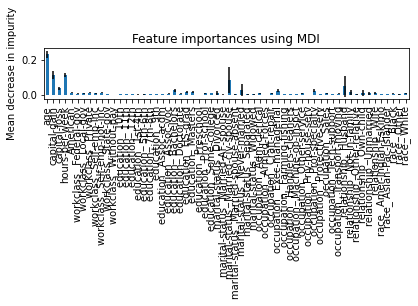

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [32]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  12.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  10.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.3min


/Users/terra/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   9.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   9.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  14.3s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  17.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  18.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  18.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  13.8s
[CV] END bootstrap=True, max_depth=10,

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   9.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  11.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  11.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  11.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  13.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  11.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  13.6s
[CV] END bootstrap=True, max_depth=90,

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  27.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  13.2s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  24.2s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.8min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  10.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=  38.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.9s
[CV] END bootstrap=False, max_depth=9

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [34]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [35]:
improved_random_forest = RandomForestClassifier(n_estimators=800, min_samples_split=10,
                                                min_samples_leaf=2, max_features='sqrt', max_depth=30, bootstrap=False)
improved_random_forest.fit(X_train, y_train)

y_pred_improved = improved_random_forest.predict(X_test)
improved_accuracy = metrics.accuracy_score(y_pred_improved, y_test)
print(f"Accuracy: {improved_accuracy}")

Accuracy: 0.8587239583333334


In [36]:
base_classifier = RandomForestClassifier()

base_classifier.fit(X_train, y_train)

y_pred_original = base_classifier.predict(X_test)
original_accuracy = metrics.accuracy_score(y_pred_original, y_test)
print(f"Accuracy: {original_accuracy}")

Accuracy: 0.837890625


In [45]:
change_in_accuracy = abs(original_accuracy - improved_accuracy)
print('Improvement of {:0.2f}%'.format(100 * change_in_accuracy))


Improvement of 2.08%


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

# Define the feature and target data
X = data_concat[features]
y = data_concat[target]
# Check for biased features
importances = improved_random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {features[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. capital-gain (0.16932482484220107)
2. marital-status_ Married-civ-spouse (0.12888570259663704)
3. age (0.09712989429752984)
4. relationship_ Husband (0.08853023389577491)
5. hours-per-week (0.06308679521672075)
6. capital-loss (0.04879914316344875)
7. marital-status_ Never-married (0.04034459669398854)
8. education_ Bachelors (0.03491872682566696)
9. occupation_ Prof-specialty (0.034558621801521715)
10. occupation_ Exec-managerial (0.03379470155123334)
11. education_ Masters (0.021816908400232506)
12. relationship_ Not-in-family (0.018566420556619938)
13. education_ HS-grad (0.015065689389345629)
14. relationship_ Own-child (0.014078770699185044)
15. relationship_ Wife (0.013342575414795754)
16. occupation_ Other-service (0.01177893744753445)
17. education_ Prof-school (0.011607743378697794)
18. marital-status_ Divorced (0.011225858232904387)
19. workclass_ Self-emp-not-inc (0.009185252026157657)
20. relationship_ Unmarried (0.008965112748855433)
21. education_ Doct

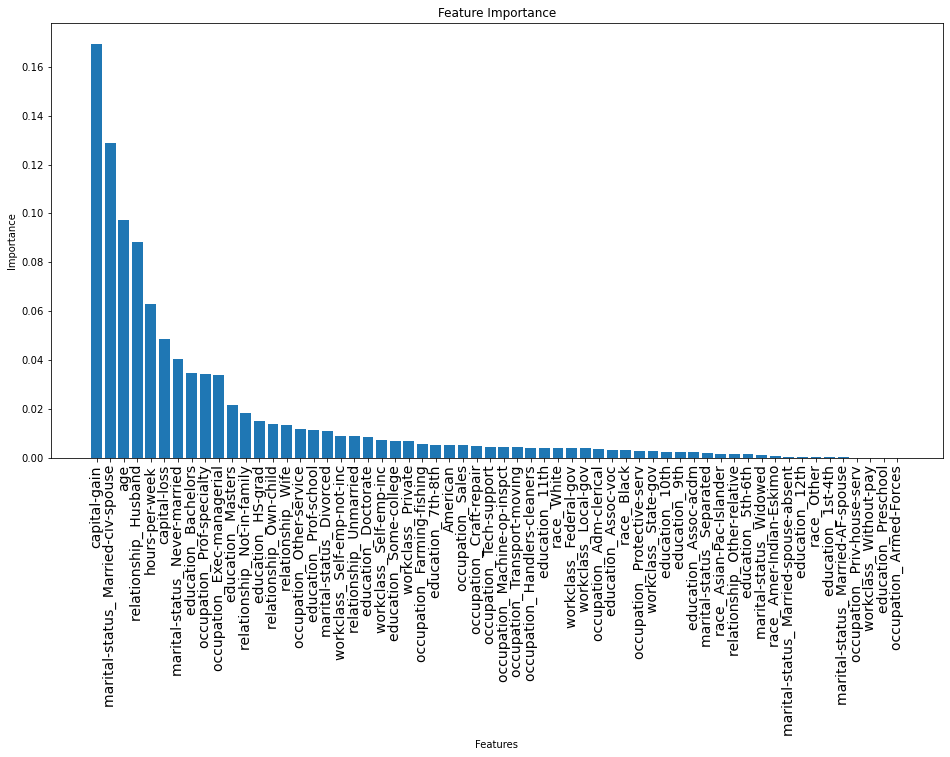

In [61]:

feature_names = np.array(features)
plt.figure(figsize=(16, 8))
plt.bar(feature_names[indices], importances[indices])
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

#### In the first model, the top 5 important features are:

age </br>
hours-per-week</br>
capital-gain</br>
marital-status_ Married-civ-spouse</br>
relationship_ Husband</br>


#### In the improved model, the top 5 important features are:

capital-gain</br>
marital-status_ Married-civ-spouse</br>
age</br>
relationship_ Husband</br>
hours-per-week</br>


One noticeable difference is that in the first model, age was the most important feature, while in the improved model, it is the third most important feature. Additionally, the importance of hours-per-week decreased from the second most important feature in the first model to the fifth most important feature in the improved model.</br>

However, the top 4 important features in both models are the same, although their order has changed. The most important feature in the improved model, capital-gain, was the third most important feature in the first model.</br>

Overall, we can say that the improved model places greater emphasis on capital-gain and marital-status_ Married-civ-spouse compared to the first model, while age and hours-per-week are still important features but to a lesser extent.</br>




In [62]:
# Calculate F1 score and print classification report
f1 = classification_report(y_test, y_pred_improved)
print(f"F1 score: \n{f1}")

F1 score: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2302
           1       0.77      0.62      0.69       770

    accuracy                           0.86      3072
   macro avg       0.83      0.78      0.80      3072
weighted avg       0.85      0.86      0.85      3072




{The F1 score provides a measure of the model's accuracy in predicting whether an individual's income is above or below $50,000 based on the features in the dataset.

The precision score for each class (0 and 1) represents the proportion of true positives (correctly predicted instances of that class) out of all instances predicted as that class. In this case, the precision for class 0 (income <=50K) is 0.88, which means that of all the instances predicted as having an income less than or equal to $50,000, 88% were actually true positives. The precision for class 1 (income >50K) is 0.77, indicating that of all the instances predicted as having an income greater than $$50,000, 77%$ were actually true positives.

The recall score for each class represents the proportion of true positives out of all instances of that class in the test set. In this case, the recall for class 0 is 0.94, indicating that 94% of all instances of class 0 (income <=50K) were correctly identified by the model. The recall for class 1 is 0.62, indicating that only 62% of all instances of class 1 (income >50K) were correctly identified.

The F1 score for each class is the harmonic mean of the precision and recall scores for that class. The weighted average F1 score is 0.85, indicating the overall performance of the model. The accuracy of the model is also reported as 0.86, which means that 86% of the instances in the test set were correctly classified by the model.}

In [69]:

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_improved)
print(f"Confusion matrix: \n{cm}")

Confusion matrix: 
[[2159  143]
 [ 291  479]]


The confusion matrix shows the number of correct and incorrect predictions made by the model on the test set. In the case of the Adult income dataset, the confusion matrix has two rows and two columns.

The first row represents the instances in the test set with a true class of 0 (income less than or equal to 50K), and the second row represents instances with a true class of 1 (income greater than 50K).

The first column represents the instances that the model predicted as 0, and the second column represents the instances that the model predicted as 1.

In the given confusion matrix, the model has made a total of 3072 predictions. Out of these, 2159 instances were correctly predicted as 0, while 143 instances that were actually 0 were wrongly predicted as 1. Similarly, 291 instances were incorrectly predicted as 0 when the true class was 1, and 479 instances were correctly predicted as 1.

Overall, the confusion matrix shows that the model is more accurate at predicting instances with a true class of 0 (less than or equal to 50K) than those with a true class of 1 (greater than 50K).



